## 测试 

In [ ]:
from btree import BTree
from btree import *

In [ ]:
# 旧树：通过一维列表初始化
n = 8
positions = [None for i in range(2**n)]
pos = [1, 
       2,3, 
       4,5, 
       8,9,10,11, 
       16,17,22,23, 
       32,33,34,35,46,47,
       68,69,70,71,
       136,137,138,139,142,143]
value = [0,
        0,10,
        0,0,
        0,20,5,0,
        0,0,7,0,
        10,20,0,0,0,6,
        0,0,5,0,
        10,6,3,10,7,2]
for p,v in zip(pos,value):
    positions[p-1] = v

# 旧树信息
old_tree = BTree.list_to_tree(positions)
old_nodes = {node.position for node in old_tree}
old_leafs = {node.position for node in old_tree.leaves}
print(old_tree)

In [ ]:
# 叶节点转非叶
leaves_seq = [0,0,3,0,3,0,4,0]
nonleaves = leaves_to_nonleaves(leaves_seq)
print(nonleaves)

# 新树：非叶节点转树
new_trees = nonleaves_to_trees(nonleaves)

In [ ]:
min_cost = sum(value) # 最小开销
optimals = [] # 最优解
operates = [] # 最优操作

for new_tree in new_trees:
    # 新树信息
    new_leafs = {node.position for node in new_tree.leaves}
    new_nodes = {node.position for node in new_tree}
    # 获取操作
    com = old_nodes.difference(old_leafs).intersection(new_leafs)
    sep = new_nodes.difference(new_leafs).intersection(old_leafs)
    # 计算开销
    com_leafs = {leaf for leaf in old_leafs if is_child(leaf,com)}
    nodes = sep.union(com_leafs) # 被修改的节点
    cost = sum(positions[i-1] for i in nodes)
    if cost == min_cost and (sep,com) not in operates:
        optimals.append(new_tree)
        operates.append((sep,com))
    elif cost < min_cost:
        min_cost = cost
        optimals= [new_tree]
        operates = [(sep,com)]

In [ ]:
# 打印结果
print("开销",min_cost)
print(old_tree)
for tree,operate in zip(optimals,operates):
    sep,com = operate
    print("拆分叶节点",sep)
    print("合并",com)
    print(tree)

## 主函数

In [ ]:
def binary_tree_cost(positions,nonleaves):
    """求二叉树变形的最优解"""
    old_tree = BTree.list_to_tree(positions)
    old_nodes = {node.position for node in old_tree}
    old_leafs = {node.position for node in old_tree.leaves}
    new_trees = nonleaves_to_trees(nonleaves)
    min_cost = sum(positions[i-1] for i in old_leafs) # 最小开销
    optimals = [] # 最优解
    operates = [] # 最优操作
    for new_tree in new_trees:
        # 新树信息
        new_leafs = {node.position for node in new_tree.leaves}
        new_nodes = {node.position for node in new_tree}
        # 获取操作
        com = old_nodes.difference(old_leafs).intersection(new_leafs)
        sep = new_nodes.difference(new_leafs).intersection(old_leafs)
        # 计算开销
        com_leafs = {leaf for leaf in old_leafs if is_child(leaf,com)}
        nodes = sep.union(com_leafs) # 被修改的节点
        cost = sum(positions[i-1] for i in nodes)
        if cost == min_cost and (sep,com) not in operates:
            optimals.append(new_tree)
            operates.append((sep,com))
        elif cost < min_cost:
            min_cost = cost
            optimals= [new_tree]
            operates = [(sep,com)]
    return operates,optimals,min_cost

## 运行示例

In [ ]:
from btree import *
# 定义旧树
n = 8
positions = [None for i in range(2**n)]
pos = [1, 
       2,3, 
       4,5, 
       8,9,10,11, 
       16,17,22,23, 
       32,33,34,35,46,47,
       68,69,70,71,
       136,137,138,139,142,143]
values = [0,
        0,10,
        0,0,
        0,20,5,0,
        0,0,7,0,
        10,20,0,0,0,6,
        0,0,5,0,
        10,6,3,10,7,2]
for p,v in zip(pos,values):
    positions[p-1] = v
leaves = [0,0,3,0,3,0,4,0]
nonleaves = leaves_to_nonleaves(leaves)

In [ ]:
operates,optimals,cost = binary_tree_cost(positions,nonleaves)
old_tree = BTree.list_to_tree(positions)
print(old_tree)
for tree,operate in zip(optimals,operates):
    sep,com = operate
    print("拆分叶节点",sep)
    print("合并",com)
    print(tree)

## 随机测试

In [29]:
from math import factorial
binomial = lambda n,k:factorial(n)//factorial(n-k)//factorial(k)

In [30]:
def tree_num_by_nonleaves(nonleaves):
    """计算遍历数目"""
    if len(nonleaves)==1:return 1
    fac = 1
    for a,b in zip(nonleaves[:-1],nonleaves[1:]):
        fac *= binomial(2*a,b)
    return fac

In [34]:
from btree import *
import time
# 定义旧树
n = 8
positions = [None for i in range(2**n)]
pos = [1, 
       2,3, 
       4,5, 
       8,9,10,11, 
       16,17,22,23, 
       32,33,34,35,46,47,
       68,69,70,71,
       136,137,138,139,142,143]
values = [0,
        0,10,
        0,0,
        0,20,5,0,
        0,0,7,0,
        10,20,0,0,0,6,
        0,0,5,0,
        10,6,3,10,7,2]
for p,v in zip(pos,values):
    positions[p-1] = v

def test(n):
    nonleaves = random_nonleaves_seq(n)
    print(nonleaves)
    old_tree = BTree.list_to_tree(positions)
    print(old_tree)
    print("总数目",tree_num_by_nonleaves(nonleaves))
    t = time.time()
    operates,optimals,cost = binary_tree_cost(positions,nonleaves)
    print("用时%.3f"%(time.time()-t))
    for tree,operate in zip(optimals,operates):
        sep,com = operate
        print("最优解数目：%d\t 最优解：%d"%(len(optimals),cost))
        print("拆分叶节点",sep)
        print("合并",com)
        print(tree)

In [39]:
test(n)

[1, 2, 3, 4, 8, 12, 22, 0]

                                             ______________0
                                            /               \
                                        ___0__               10
                                       /      \
          ____________________________0        0__
         /                             \      /   \
     ___0________________               20   5     0__
    /                    \                        /   \
  _0               _______0__                    7     0
 /  \             /          \                        / \
10   20        __0__          0__                    0   6
              /     \        /   \
            _0       0      5     0
           /  \     / \          / \
          10   6   3   10       7   2

总数目 30139200


KeyboardInterrupt: 

In [32]:
acceptable = 0
intolerable = 0
for i in range(1000000):
    nonleaves = random_nonleaves_seq(n)
    num = tree_num_by_nonleaves(nonleaves)
    if num < 10**7:
        acceptable += 1
    else:
        intolerable += 1
acceptable,intolerable

(900403, 99597)

In [82]:
nonleaves = [1, 2, 4, 8, 16, 26, 26, 0]
tree_num_by_nonleaves(nonleaves)

449397407209308259968

In [13]:
from binarytree import tree,bst,Node

In [60]:
graph = t.graphviz()
graph.render("test")

'test.pdf'

In [58]:
t = bst(height=5, is_perfect=True)
leaves = t.leaves
for a in [26,26]:
    new_leaves = []
    for i in range(a):
        leaves[i].left = Node(0)
        leaves[i].right = Node(0)
        new_leaves.extend([leaves[i].left,leaves[i].right])
    leaves = new_leaves

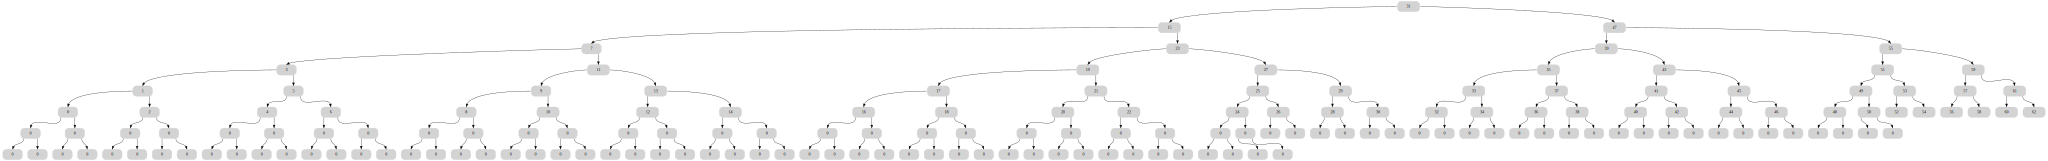

In [59]:
[1, 2, 4, 7, 12, 24, 29, 0]
[1, 2, 3, 4, 8, 12, 22, 0]